<a href="https://colab.research.google.com/github/aarjavjain824/BCS_Speech_emotion_recognition/blob/main/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 97% 417M/429M [00:04<00:00, 84.8MB/s]
100% 429M/429M [00:04<00:00, 98.0MB/s]


In [ ]:
!unzip ravdess-emotional-speech-audio.zip -d /content/Actor_folders

In [ ]:
import numpy as np
def extractfeatures(x, sr, features):
    result = np.array([])

    for feature in features:
      if feature=='MFCC':
        #MFCC
        mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr).T, axis=0)
        result = np.hstack((result, mfcc)) 
      if feature=='Spectral Centroid':
        #Spectral Centroid
        specc = np.mean(librosa.feature.spectral_centroid(y=x, sr=sr)[0])
        result = np.hstack((result, specc))
      if feature=='Spectral Bandwidth':
        #Spectral Centroid
        specb = np.mean(librosa.feature.spectral_bandwidth(y=x, sr=sr)[0])
        result = np.hstack((result, specb)) 
      if feature=='Spectral Contrast':
        #Spectral Centroid
        speco = np.mean(librosa.feature.spectral_contrast(y=x, sr=sr)[0])
        result = np.hstack((result, speco))
      if feature=='Spectral Rolloff':
        #Spectral Rolloff
        specr = np.mean(librosa.feature.spectral_rolloff(y=x, sr=sr))
        result = np.hstack((result, specr))
      if feature=='Fourier Tempogram':
        #Fourier Tempogram
        fouriert = np.mean(librosa.feature.fourier_tempogram(y=x, sr=sr))
        result = np.hstack((result, fouriert))
      if feature=='Chroma':
        #Chroma
        chroma = np.abs(librosa.stft(x))
        chroma_stft = np.mean(librosa.feature.chroma_stft(S=chroma, sr=sr).T, axis=0)
        result = np.hstack((result, chroma_stft))
      if feature=='Mel Spectogram': 
        #Mel Spectogram
        mel = np.mean(librosa.feature.melspectrogram(y=x, sr=sr).T, axis=0)
        result = np.hstack((result, mel)) 
      if feature=='zerocrossingrate':
        #zerocrossingrate
        zcrate = np.mean(librosa.feature.zero_crossing_rate(y=x).T, axis=0)
        result=np.hstack((result, zcrate)) 
      
    return result

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [ ]:
import os
from glob import iglob

rootdir_glob = '/content/Actor_folders/**/*' # Note the added asterisks
# This will return absolute paths
orig_file_list = [f for f in iglob(rootdir_glob, recursive=True) if os.path.isfile(f)]

In [ ]:
from random import sample
import copy
import sklearn

X=[]
y=[]

for i in range (len(orig_file_list)):

  x , sr = librosa.load(orig_file_list[i])
  result=extractfeatures(x, sr,['Mel Spectogram'])
  X.append(result)

  
  audio_path=orig_file_list[i].split('/')[4:][0]
  parts=audio_path.split('.')[0].split('-')
  y.append(int(parts[2]))


X=np.array(X)
y=np.array(y)

y=y.reshape(-1,1)
X=X.reshape(-1,1,X.shape[1])

y=y-1

In [ ]:
def build_rnn_model(input_shape=(1,X.shape[2]), num_class=8, dropout_rate=0.1):

  model = tf.keras.models.Sequential([

            tf.keras.layers.LSTM(64,recurrent_dropout=0.2, activation='linear',input_shape=input_shape, return_sequences=True),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(dropout_rate),  
            tf.keras.layers.LSTM(64,recurrent_dropout=0.2, activation='tanh',return_sequences=True),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(dropout_rate),  
            tf.keras.layers.LSTM(64,recurrent_dropout=0.2, activation='linear'),
            tf.keras.layers.BatchNormalization(),
             tf.keras.layers.Dropout(dropout_rate),      
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(num_class, activation='softmax')
        ])
  # -------------------------------

  return model

Epoch 1/300
11/11 [==============================] - 8s 88ms/step - loss: 2.5116 - accuracy: 0.1435 - val_loss: 2.0693 - val_accuracy: 0.1528
Epoch 2/300
11/11 [==============================] - 0s 14ms/step - loss: 2.0661 - accuracy: 0.2569 - val_loss: 2.0599 - val_accuracy: 0.1667
Epoch 3/300
11/11 [==============================] - 0s 15ms/step - loss: 1.9554 - accuracy: 0.2554 - val_loss: 2.0519 - val_accuracy: 0.1528
Epoch 4/300
11/11 [==============================] - 0s 13ms/step - loss: 1.9239 - accuracy: 0.2832 - val_loss: 2.0465 - val_accuracy: 0.1944
Epoch 5/300
11/11 [==============================] - 0s 14ms/step - loss: 1.8639 - accuracy: 0.2832 - val_loss: 2.0437 - val_accuracy: 0.1875
Epoch 6/300
11/11 [==============================] - 0s 15ms/step - loss: 1.8035 - accuracy: 0.3179 - val_loss: 2.0426 - val_accuracy: 0.1875
Epoch 7/300
11/11 [==============================] - 0s 14ms/step - loss: 1.8055 - accuracy: 0.3025 - val_loss: 2.0464 - val_accuracy: 0.1875
Epoch 

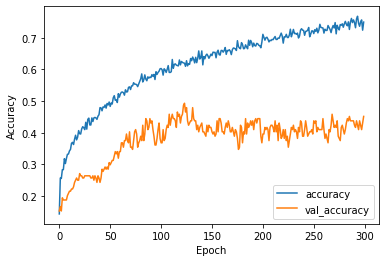

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


model=build_rnn_model()
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=300, batch_size=128,validation_data=(X_test, y_test))

plot_history(history)
model.summary()